In [1]:
%load_ext autoreload
%autoreload 2

from generate_networks import *
from constants_and_utils import *
from analyze_networks import *
from plotting import *

import matplotlib.pyplot as plt

In [2]:
persona_fn = 'us_50.json'
fn = os.path.join(PATH_TO_TEXT_FILES, persona_fn)
with open(fn) as f:
    personas = json.load(f)
personas

{'1': {'age': 46,
  'gender': 'Woman',
  'religion': 'Protestant',
  'political affiliation': 'Democrat',
  'race/ethnicity': 'White'},
 '2': {'age': 29,
  'gender': 'Man',
  'religion': 'Catholic',
  'political affiliation': 'Independent',
  'race/ethnicity': 'Latino'},
 '3': {'age': 66,
  'gender': 'Man',
  'religion': 'Catholic',
  'political affiliation': 'Republican',
  'race/ethnicity': 'Latino'},
 '4': {'age': 38,
  'gender': 'Man',
  'religion': 'Catholic',
  'political affiliation': 'Democrat',
  'race/ethnicity': 'Latino'},
 '5': {'age': 65,
  'gender': 'Woman',
  'religion': 'Protestant',
  'political affiliation': 'Republican',
  'race/ethnicity': 'White'},
 '6': {'age': 42,
  'gender': 'Woman',
  'religion': 'Protestant',
  'political affiliation': 'Republican',
  'race/ethnicity': 'White'},
 '7': {'age': 36,
  'gender': 'Woman',
  'religion': 'Unreligious',
  'political affiliation': 'Democrat',
  'race/ethnicity': 'Latino'},
 '8': {'age': 41,
  'gender': 'Woman',
  'reli

In [3]:
demos_to_include = ['name', 'gender', 'age', 'race/ethnicity', 'religion', 'political affiliation']
get_persona_format(demos_to_include)

'ID. Name - Gender, Age, Race/ethnicity, Religion, Political affiliation'

In [4]:
demos_to_include = ['gender', 'age', 'race/ethnicity', 'religion', 'political affiliation']
get_persona_format(demos_to_include)

'ID. Gender, Age, Race/ethnicity, Religion, Political affiliation'

In [5]:
persona = personas['1']
convert_persona_to_string(persona, demos_to_include, pid=1)

'1. Woman, age 46, White, Protestant, Democrat'

In [6]:
sys_prompt = get_system_prompt('global', personas, demos_to_include)
print(sys_prompt)

Your task is to create a realistic social network. You will be provided a list of people in the network, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation". Provide a list of friendship pairs in the format <ID>, <ID> with each pair separated by a newline. Do not include any other text in your response. Do not include any people who are not listed below.


In [7]:
np.random.seed(0)
pids = list(personas.keys())
order = np.random.choice(pids, size=len(pids), replace=False)  # order of printing personas
order

array(['29', '12', '11', '42', '3', '28', '39', '32', '23', '5', '34',
       '36', '27', '35', '19', '8', '15', '46', '49', '30', '16', '31',
       '33', '17', '43', '21', '44', '9', '14', '26', '6', '18', '41',
       '50', '2', '13', '38', '25', '7', '24', '37', '22', '20', '10',
       '40', '47', '4', '1', '48', '45'], dtype='<U2')

In [8]:
user_prompt = get_user_prompt('global', personas, order, demos_to_include)
print(user_prompt)

29. Woman, age 22, Latino, Catholic, Democrat
12. Woman, age 56, White, Protestant, Democrat
11. Man, age 26, Black, Protestant, Democrat
42. Man, age 29, Latino, Catholic, Republican
3. Man, age 66, Latino, Catholic, Republican
28. Man, age 27, White, Protestant, Republican
39. Woman, age 60, White, Unreligious, Democrat
32. Man, age 43, Latino, Catholic, Republican
23. Woman, age 55, White, Protestant, Democrat
5. Woman, age 65, White, Protestant, Republican
34. Woman, age 76, Black, Unreligious, Democrat
36. Man, age 38, White, Protestant, Republican
27. Woman, age 60, White, Unreligious, Republican
35. Man, age 50, Latino, Catholic, Democrat
19. Woman, age 64, White, Protestant, Democrat
8. Woman, age 41, Asian, Hindu, Independent
15. Man, age 23, Black, Unreligious, Democrat
46. Man, age 46, Black, Unreligious, Democrat
49. Woman, age 64, Latino, Unreligious, Democrat
30. Man, age 40, White, Protestant, Independent
16. Woman, age 35, White, Protestant, Republican
31. Woman, age 67

In [9]:
personas['29']

{'age': 22,
 'gender': 'Woman',
 'religion': 'Catholic',
 'political affiliation': 'Democrat',
 'race/ethnicity': 'Latino'}

In [12]:
model = 'gpt-3.5-turbo'
G = nx.Graph()
G.add_nodes_from(order)
response = get_gpt_response(model, sys_prompt, user_prompt, verbose=True)
G = update_graph_from_response('global', response, G)

SYSTEM:
Your task is to create a realistic social network. You will be provided a list of people in the network, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation". Provide a list of friendship pairs in the format <ID>, <ID> with each pair separated by a newline. Do not include any other text in your response. Do not include any people who are not listed below.

USER:
29. Woman, 22, Latino, Catholic, Democrat
12. Woman, 56, White, Protestant, Democrat
11. Man, 26, Black, Protestant, Democrat
42. Man, 29, Latino, Catholic, Republican
3. Man, 66, Latino, Catholic, Republican
28. Man, 27, White, Protestant, Republican
39. Woman, 60, White, Unreligious, Democrat
32. Man, 43, Latino, Catholic, Republican
23. Woman, 55, White, Protestant, Democrat
5. Woman, 65, White, Protestant, Republican
34. Woman, 76, Black, Unreligious, Democrat
36. Man, 38, White, Protestant, Republican
27. Woman, 60, White, Unreligious, Republican
35. Man, 50, Latino, 

41


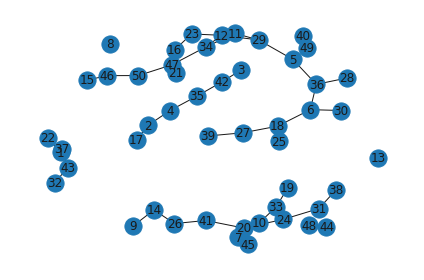

In [13]:
print(len(G.edges()))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=0, k=2*1/np.sqrt(len(G.nodes()))))
plt.axis("off")  # turn off axis
axis = plt.gca()
axis.set_xlim([1.1*x for x in axis.get_xlim()])  # add padding so that node labels aren't cut off
axis.set_ylim([1.1*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()

In [14]:
sys_prompt = get_system_prompt('local', personas, demos_to_include, curr_pid=order[0])
print(sys_prompt)

You are a Woman, 22, Latino, Catholic, Democrat. You are joining a social network.

You will be provided a list of people in the network, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation".

Which of these people will you become friends with? Provide a list of friends in the format <ID>, <ID>, <ID>, etc. Do not include any other text in your response. Do not include any people who are not listed below.


In [15]:
user_prompt = get_user_prompt('local', personas, order, demos_to_include, curr_pid=order[0])
print(user_prompt)

12. Woman, 56, White, Protestant, Democrat
11. Man, 26, Black, Protestant, Democrat
42. Man, 29, Latino, Catholic, Republican
3. Man, 66, Latino, Catholic, Republican
28. Man, 27, White, Protestant, Republican
39. Woman, 60, White, Unreligious, Democrat
32. Man, 43, Latino, Catholic, Republican
23. Woman, 55, White, Protestant, Democrat
5. Woman, 65, White, Protestant, Republican
34. Woman, 76, Black, Unreligious, Democrat
36. Man, 38, White, Protestant, Republican
27. Woman, 60, White, Unreligious, Republican
35. Man, 50, Latino, Catholic, Democrat
19. Woman, 64, White, Protestant, Democrat
8. Woman, 41, Asian, Hindu, Independent
15. Man, 23, Black, Unreligious, Democrat
46. Man, 46, Black, Unreligious, Democrat
49. Woman, 64, Latino, Unreligious, Democrat
30. Man, 40, White, Protestant, Independent
16. Woman, 35, White, Protestant, Republican
31. Woman, 67, Asian, Unreligious, Independent
33. Woman, 60, Black, Protestant, Democrat
17. Man, 29, Native American/Alaska Native, Unreligio

In [16]:
G = nx.Graph()
G.add_nodes_from(order)
response = get_gpt_response(model, sys_prompt, user_prompt, verbose=True)
G = update_graph_from_response('local', response, G, curr_pid=order[0])

SYSTEM:
You are a Woman, 22, Latino, Catholic, Democrat. You are joining a social network.

You will be provided a list of people in the network, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation".

Which of these people will you become friends with? Provide a list of friends in the format <ID>, <ID>, <ID>, etc. Do not include any other text in your response. Do not include any people who are not listed below.

USER:
12. Woman, 56, White, Protestant, Democrat
11. Man, 26, Black, Protestant, Democrat
42. Man, 29, Latino, Catholic, Republican
3. Man, 66, Latino, Catholic, Republican
28. Man, 27, White, Protestant, Republican
39. Woman, 60, White, Unreligious, Democrat
32. Man, 43, Latino, Catholic, Republican
23. Woman, 55, White, Protestant, Democrat
5. Woman, 65, White, Protestant, Republican
34. Woman, 76, Black, Unreligious, Democrat
36. Man, 38, White, Protestant, Republican
27. Woman, 60, White, Unreligious, Republican
35. Man, 50, 

In [17]:
G.edges()

EdgeView([('29', '44'), ('29', '13'), ('29', '48'), ('29', '4')])

In [18]:
# use NEXT persona, keep graph
sys_prompt = get_system_prompt('sequential', personas, demos_to_include, curr_pid=order[1])
print(sys_prompt)

You are a Woman, 56, White, Protestant, Democrat. You are joining a social network.

You will be provided a list of people in the network, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation". You will also be provided a list of existing friendship pairs in the network, in the format <ID>, <ID> with each pair separated by a newline.

Which of these people will you become friends with? Provide a list of *YOUR* friends in the format <ID>, <ID>, <ID>, etc. Do not include any other text in your response. Do not include any people who are not listed below.


In [19]:
user_prompt = get_user_prompt('sequential', personas, order, demos_to_include, curr_pid=order[1], G=G)
print(user_prompt)

People
29. Woman, 22, Latino, Catholic, Democrat
11. Man, 26, Black, Protestant, Democrat
42. Man, 29, Latino, Catholic, Republican
3. Man, 66, Latino, Catholic, Republican
28. Man, 27, White, Protestant, Republican
39. Woman, 60, White, Unreligious, Democrat
32. Man, 43, Latino, Catholic, Republican
23. Woman, 55, White, Protestant, Democrat
5. Woman, 65, White, Protestant, Republican
34. Woman, 76, Black, Unreligious, Democrat
36. Man, 38, White, Protestant, Republican
27. Woman, 60, White, Unreligious, Republican
35. Man, 50, Latino, Catholic, Democrat
19. Woman, 64, White, Protestant, Democrat
8. Woman, 41, Asian, Hindu, Independent
15. Man, 23, Black, Unreligious, Democrat
46. Man, 46, Black, Unreligious, Democrat
49. Woman, 64, Latino, Unreligious, Democrat
30. Man, 40, White, Protestant, Independent
16. Woman, 35, White, Protestant, Republican
31. Woman, 67, Asian, Unreligious, Independent
33. Woman, 60, Black, Protestant, Democrat
17. Man, 29, Native American/Alaska Native, Unr

In [20]:
response = get_gpt_response(model, sys_prompt, user_prompt, verbose=True)
G = update_graph_from_response('sequential', response, G, curr_pid=order[1])

SYSTEM:
You are a Woman, 56, White, Protestant, Democrat. You are joining a social network.

You will be provided a list of people in the network, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation". You will also be provided a list of existing friendship pairs in the network, in the format <ID>, <ID> with each pair separated by a newline.

Which of these people will you become friends with? Provide a list of *YOUR* friends in the format <ID>, <ID>, <ID>, etc. Do not include any other text in your response. Do not include any people who are not listed below.

USER:
People
29. Woman, 22, Latino, Catholic, Democrat
11. Man, 26, Black, Protestant, Democrat
42. Man, 29, Latino, Catholic, Republican
3. Man, 66, Latino, Catholic, Republican
28. Man, 27, White, Protestant, Republican
39. Woman, 60, White, Unreligious, Democrat
32. Man, 43, Latino, Catholic, Republican
23. Woman, 55, White, Protestant, Democrat
5. Woman, 65, White, Protestant, R

179


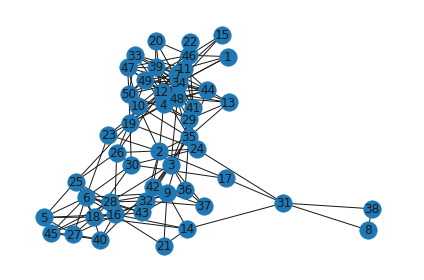

In [45]:
# load local network
fn = os.path.join(PATH_TO_TEXT_FILES, 'local_gpt-3.5-turbo_0.adj')
G = nx.read_adjlist(fn)
print(len(G.edges()))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=0, k=2*1/np.sqrt(len(G.nodes()))))
plt.axis("off")  # turn off axis
axis = plt.gca()
axis.set_xlim([1.1*x for x in axis.get_xlim()])  # add padding so that node labels aren't cut off
axis.set_ylim([1.1*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()

In [48]:
'soih.'.strip('.')

'soih'

In [46]:
sys_prompt = get_system_prompt('iterative-add', personas, demos_to_include, curr_pid=order[0], G=G)
print(sys_prompt)

You are a Woman, 22, Latino, Catholic, Democrat. You are part of a social network and you want to make a new friend.

You will be provided a list of potential new friends, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation", followed by a list of their friends' IDs. Keep in mind that you are already friends with IDs 35, 4, 48, 13, 7, 50, 3, 24

Which person in the list are you likeliest to befriend? Answer by providing this person's ID. Do not include any other text in your response. Do not include any people who are not listed below.


In [47]:
sys_prompt = get_system_prompt('iterative-add', personas, demos_to_include, curr_pid=order[0], G=G, include_reason=True)
print(sys_prompt)

You are a Woman, 22, Latino, Catholic, Democrat. You are part of a social network and you want to make a new friend.

You will be provided a list of potential new friends, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation", followed by a list of their friends' IDs. Keep in mind that you are already friends with IDs 35, 4, 48, 13, 7, 50, 3, 24

Which person in the list are you likeliest to befriend? Provide your answer in JSON form: {"new friend": <ID>, "reason": <reason for adding friend>}. Do not include any other text in your response. Do not include any people who are not listed below.


In [28]:
user_prompt = get_user_prompt('iterative-add', personas, order, demos_to_include, curr_pid=order[0], G=G)
print(user_prompt)

42. Man, 29, Latino, Catholic, Republican; friends with 32, 2, 35, 40, 3, 37
10. Woman, 26, Black, Protestant, Democrat; friends with 11, 35, 50, 2, 47, 48
10. Woman, 26, Black, Protestant, Democrat; friends with 11, 35, 50, 2, 47, 48
6. Woman, 42, White, Protestant, Republican; friends with 28, 23, 5, 27, 30, 16, 43, 9, 25, 18, 45
9. Woman, 39, White, Unreligious, Republican; friends with 16, 21, 14, 41, 6


In [29]:
response = get_gpt_response(model, sys_prompt, user_prompt, verbose=True)

SYSTEM:
You are a Woman, 22, Latino, Catholic, Democrat. You are part of a social network and you want to make a new friend.

You will be provided a list of potential new friends, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation", followed by a list of their friends' IDs. Keep in mind that you are already friends with IDs 35, 4, 48, 13, 7, 50, 3, 24

Which person in the list are you likeliest to befriend? Provide your answer in the form: {"new friend": ID, "reason": reason}. Do not include any other text in your response. Do not include any people who are not listed below.

USER:
42. Man, 29, Latino, Catholic, Republican; friends with 32, 2, 35, 40, 3, 37
10. Woman, 26, Black, Protestant, Democrat; friends with 11, 35, 50, 2, 47, 48
10. Woman, 26, Black, Protestant, Democrat; friends with 11, 35, 50, 2, 47, 48
6. Woman, 42, White, Protestant, Republican; friends with 28, 23, 5, 27, 30, 16, 43, 9, 25, 18, 45
9. Woman, 39, White, Unrelig

In [42]:
json.loads('{"new friend": 32, "reason": "You share the same political affiliation and have a few mutual friends, which could make for a good starting point for a new friendship."}')

{'new friend': 32,
 'reason': 'You share the same political affiliation and have a few mutual friends, which could make for a good starting point for a new friendship.'}

In [35]:
print(list(G.neighbors(order[0])))
G = update_graph_from_response('iterative-add', response, G, curr_pid=order[0])
print(list(G.neighbors(order[0])))  # check that new friend was added

['35', '4', '48', '13', '7', '50', '3', '24']
['35', '4', '48', '13', '7', '50', '3', '24', '10']


In [37]:
sys_prompt = get_system_prompt('iterative-drop', personas, demos_to_include, curr_pid=order[0], G=G)
print(sys_prompt)

You are a Woman, 22, Latino, Catholic, Democrat. Unfortunately, you are busy with work and unable to keep up all your friendships.

You will be provided a list of your current friends, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation", followed by a list of their friends' IDs. 

Which of your friends are you likeliest to stop seeing? Provide your answer in the form: {"lost friend": ID, "reason": reason}. Do not include any other text in your response. Do not include any people who are not listed below.


In [38]:
user_prompt = get_user_prompt('iterative-drop', personas, order, demos_to_include, curr_pid=order[0], G=G)
print(user_prompt)

13. Woman, 63, Latino, Catholic, Democrat; friends with 29, 12, 34, 35, 44, 48
10. Woman, 26, Black, Protestant, Democrat; friends with 11, 35, 50, 2, 47, 48, 29
3. Man, 66, Latino, Catholic, Republican; friends with 29, 42, 32, 2, 34, 43, 36, 37, 35, 28
35. Man, 50, Latino, Catholic, Democrat; friends with 29, 42, 3, 36, 44, 10, 13, 48, 2
24. Woman, 68, White, Protestant, Independent; friends with 29, 12, 19, 30, 31, 26
4. Man, 38, Latino, Catholic, Democrat; friends with 29, 11, 34, 19, 49, 44, 2, 7
48. Woman, 24, Latino, Catholic, Democrat; friends with 29, 12, 11, 39, 23, 34, 35, 49, 44, 13, 7, 10
7. Woman, 36, Latino, Unreligious, Democrat; friends with 29, 11, 39, 34, 46, 49, 33, 44, 4, 48
50. Man, 73, Black, Protestant, Democrat; friends with 29, 11, 39, 34, 49, 30, 33, 10, 47


In [39]:
response = get_gpt_response(model, sys_prompt, user_prompt, verbose=True)

SYSTEM:
You are a Woman, 22, Latino, Catholic, Democrat. Unfortunately, you are busy with work and unable to keep up all your friendships.

You will be provided a list of your current friends, where each person is described as "ID. Gender, Age, Race/ethnicity, Religion, Political affiliation", followed by a list of their friends' IDs. 

Which of your friends are you likeliest to stop seeing? Provide your answer in the form: {"lost friend": ID, "reason": reason}. Do not include any other text in your response. Do not include any people who are not listed below.

USER:
13. Woman, 63, Latino, Catholic, Democrat; friends with 29, 12, 34, 35, 44, 48
10. Woman, 26, Black, Protestant, Democrat; friends with 11, 35, 50, 2, 47, 48, 29
3. Man, 66, Latino, Catholic, Republican; friends with 29, 42, 32, 2, 34, 43, 36, 37, 35, 28
35. Man, 50, Latino, Catholic, Democrat; friends with 29, 42, 3, 36, 44, 10, 13, 48, 2
24. Woman, 68, White, Protestant, Independent; friends with 29, 12, 19, 30, 31, 26
4

In [40]:
print(list(G.neighbors(order[0])))
G = update_graph_from_response('iterative-drop', response, G, curr_pid=order[0])
print(list(G.neighbors(order[0])))  # check that friend was dropped

['35', '4', '48', '13', '7', '50', '3', '24', '10']
['35', '4', '48', '13', '7', '50', '3', '10']


# Analyze networks

In [2]:
persona_fn = 'us_50.json'
fn = os.path.join(PATH_TO_TEXT_FILES, persona_fn)
with open(fn) as f:
    personas = json.load(f)
print(len(personas))

demos_to_include = ['gender', 'age', 'race/ethnicity', 'religion', 'political affiliation']

50


In [4]:
model = 'gpt-3.5-turbo'
min_seed = 0
max_seed = 29
for method in ['global', 'local', 'sequential']:
    list_of_G = load_list_of_graphs(f'{method}_{model}', min_seed, max_seed+1, directed=False)
    print(f'{method}_{model}: found {len(list_of_G)} graphs')
    summarize_network_metrics(list_of_G, personas, demos_to_include, f'{method}_{model}', demos=True)
    print()

global_gpt-3.5-turbo: found 30 graphs
Saved homophily metrics to global_gpt-3.5-turbo/homophily.csv
Saved network metrics to global_gpt-3.5-turbo/network_metrics.csv

local_gpt-3.5-turbo: found 30 graphs
Saved homophily metrics to local_gpt-3.5-turbo/homophily.csv
Saved network metrics to local_gpt-3.5-turbo/network_metrics.csv

sequential_gpt-3.5-turbo: found 30 graphs
Saved homophily metrics to sequential_gpt-3.5-turbo/homophily.csv
Saved network metrics to sequential_gpt-3.5-turbo/network_metrics.csv



In [5]:
min_seed = 0
max_seed = 2
method = 'iterative'
list_of_G = load_list_of_graphs(f'{method}_{model}', min_seed, max_seed+1, directed=False)
print(f'{method}_{model}: found {len(list_of_G)} graphs')
summarize_network_metrics(list_of_G, personas, demos_to_include, f'{method}_{model}', demos=True)

iterative_gpt-3.5-turbo: found 3 graphs
Saved homophily metrics to iterative_gpt-3.5-turbo/homophily.csv
Saved network metrics to iterative_gpt-3.5-turbo/network_metrics.csv


In [6]:
dfs = []
for method in ['global', 'local', 'sequential', 'iterative']:
    homophily_df = pd.read_csv(f'stats/{method}_gpt-3.5-turbo/homophily.csv')
    dfs.append(homophily_df)
homophily_df = pd.concat(dfs)
homophily_df.groupby('save_name').size()

save_name
global_gpt-3.5-turbo        150
iterative_gpt-3.5-turbo      15
local_gpt-3.5-turbo         150
sequential_gpt-3.5-turbo    150
dtype: int64

In [7]:
homophily_df.sample(10)

,graph_nr,demo,_metric_value,save_name
98,19.0,religion,0.644772,sequential_gpt-3.5-turbo
149,29.0,political affiliation,0.243579,local_gpt-3.5-turbo
52,10.0,race/ethnicity,0.446518,local_gpt-3.5-turbo
74,14.0,political affiliation,0.723090,sequential_gpt-3.5-turbo
98,19.0,religion,0.591109,global_gpt-3.5-turbo
63,12.0,religion,0.505441,global_gpt-3.5-turbo
145,29.0,gender,0.688772,sequential_gpt-3.5-turbo
38,7.0,religion,0.597304,sequential_gpt-3.5-turbo
102,20.0,race/ethnicity,0.572342,sequential_gpt-3.5-turbo
18,3.0,religion,0.723532,local_gpt-3.5-turbo


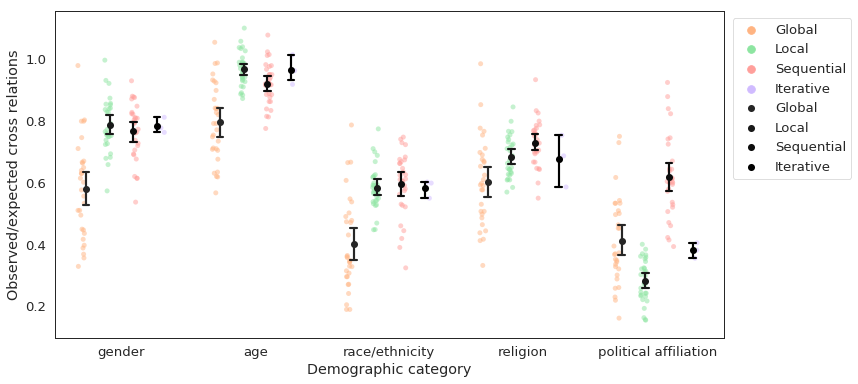

In [10]:
make_plot(homophily_df, plot_homophily=True, plot_type='default')

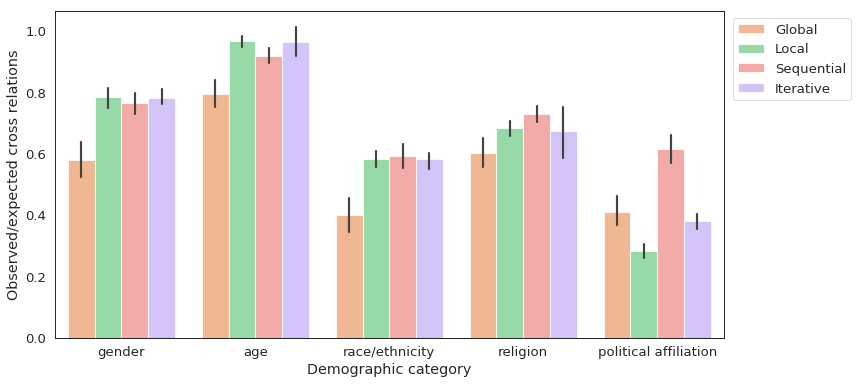

In [11]:
make_plot(homophily_df, plot_homophily=True, plot_type='bar')

In [16]:
dfs = []
for method in ['global', 'local', 'sequential', 'iterative']:
    network_df = pd.read_csv(f'stats/{method}_gpt-3.5-turbo/network_metrics.csv')
    dfs.append(network_df)
network_df = pd.concat(dfs)
network_df.groupby('save_name').size()

save_name
global_gpt-3.5-turbo        4650
iterative_gpt-3.5-turbo      465
local_gpt-3.5-turbo         4650
sequential_gpt-3.5-turbo    4650
dtype: int64

In [17]:
network_df.dtypes

graph_nr         float64
metric_name       object
_metric_value    float64
save_name         object
node             float64
dtype: object

In [18]:
network_df.sample(10)

,graph_nr,metric_name,_metric_value,save_name,node
3823,24.0,betweenness_centrality,0.000000,global_gpt-3.5-turbo,28.0
4261,27.0,betweenness_centrality,0.000000,global_gpt-3.5-turbo,28.0
2092,12.0,closeness_centrality,0.457944,local_gpt-3.5-turbo,6.0
3060,19.0,betweenness_centrality,0.017262,global_gpt-3.5-turbo,9.0
1727,10.0,betweenness_centrality,0.000000,global_gpt-3.5-turbo,41.0
3214,20.0,betweenness_centrality,0.000000,global_gpt-3.5-turbo,25.0
4277,27.0,betweenness_centrality,0.000726,sequential_gpt-3.5-turbo,3.0
1556,9.0,betweenness_centrality,0.044501,global_gpt-3.5-turbo,3.0
2643,16.0,betweenness_centrality,0.000000,global_gpt-3.5-turbo,15.0
451,2.0,degree_centrality,0.142857,local_gpt-3.5-turbo,40.0


Dropping node-level stats: kept 465 out of 14415 rows


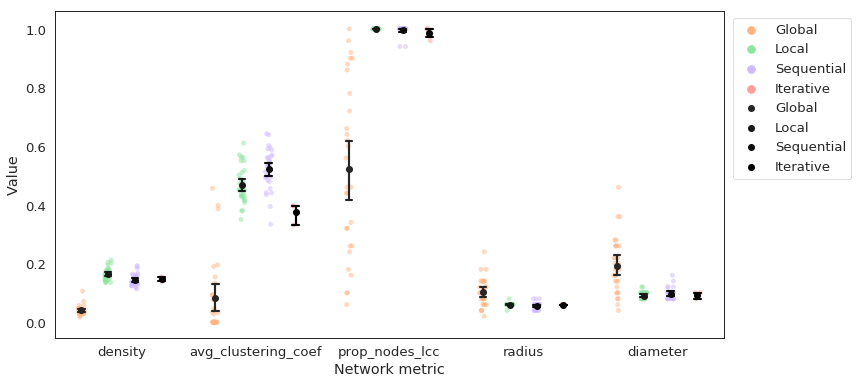

In [26]:
make_plot(network_df, plot_homophily=False, plot_type='default')

Dropping node-level stats: kept 465 out of 14415 rows
Keeping rows in ['density']: kept 93 out of 465 rows


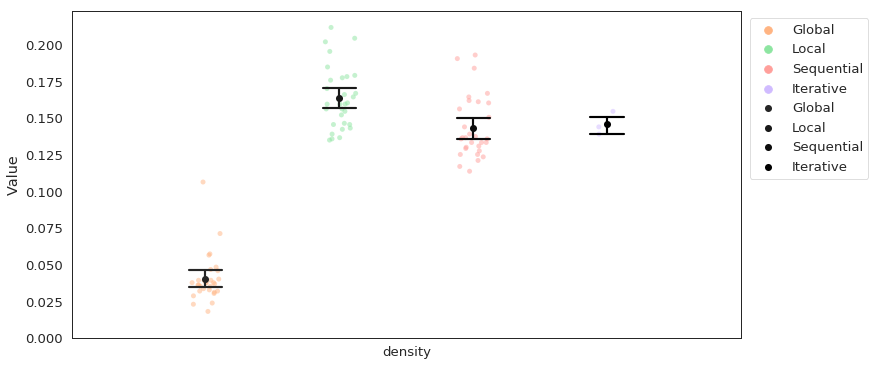

In [24]:
make_plot(network_df, plot_homophily=False, plot_type='default', x_to_keep=['density'])

Dropping node-level stats: kept 465 out of 14415 rows
Keeping rows in ['avg_clustering_coef']: kept 93 out of 465 rows


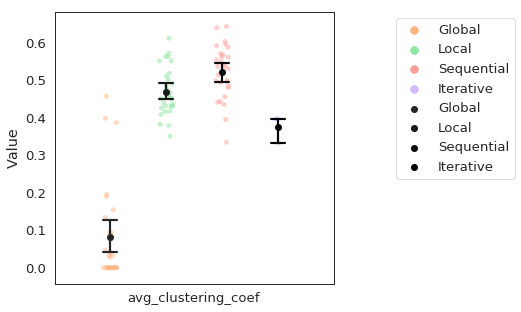

In [23]:
make_plot(network_df, plot_homophily=False, plot_type='default', 
          figsize=(5,5), x_to_keep=['avg_clustering_coef'])

Dropping node-level stats: kept 450 out of 13950 rows


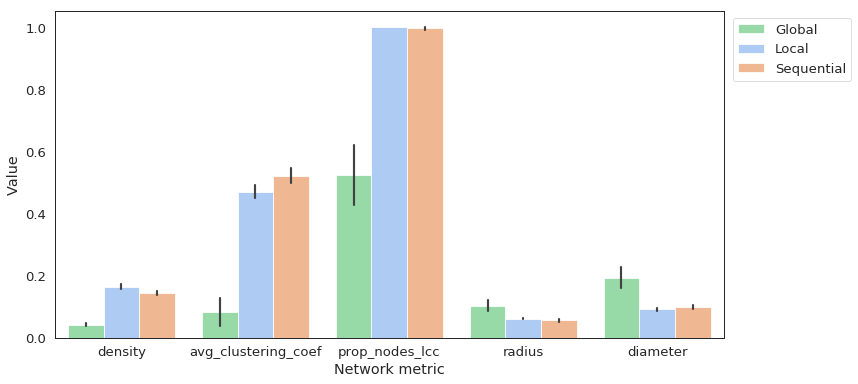

In [61]:
make_plot(network_df, plot_homophily=False, plot_type='bar')

# Load real networks

In [64]:
from network_datasets import *

In [78]:
G = load_50_women(1)
len(G.nodes()), len(G.edges)

NameError: name 'values' is not defined

In [60]:
G = load_50_women(1)
len(G.nodes()), len(G.edges)

(50, 74)

In [67]:
G = load_attiro()
len(G.nodes), len(G.edges)

(60, 161)

In [68]:
G = load_san_juan()
len(G.nodes), len(G.edges)

(75, 197)

In [69]:
fn = os.path.join(PATH_TO_REAL_NETWORKS, 's50', f's50_d01.xml')

In [70]:
import xml.etree.ElementTree as ET

tree = ET.parse(fn)
tree

In [71]:
root = tree.getroot()
root

<Element 'DynamicNetwork' at 0x7f78f8133cb0>

In [76]:
metanetwork = root.find('MetaNetwork')
nodes = metanetwork.find('nodes').find('nodeclass')
nodes = nodes.findall('node')
len(nodes)

50

In [ ]:
nodes = 

In [40]:
root.tag

'DynamicNetwork'

In [52]:
for el in root.iter():  # depth-first order
    if el.tag == 'node':
        print(el.get('id'))
    elif el.tag == 'link':
        print(el.get('source'), el.get('target'))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
1 11
1 14
2 7
2 11
3 4
3 9
4 3
4 9
5 32
6 8
7 2
7 42
7 44
8 6
9 3
9 4
10 11
10 15
10 33
11 2
11 15
11 16
12 7
12 42
12 44
14 1
14 10
14 11
15 10
15 11
15 16
16 11
16 15
17 18
17 19
17 21
17 22
17 24
18 19
18 35
19 11
19 24
19 26
19 30
21 22
22 17
22 21
22 31
22 34
23 24
24 17
24 19
24 21
24 22
24 23
25 22
25 31
25 32
26 7
26 29
26 44
27 28
27 29
27 30
28 27
29 26
29 30
29 33
30 11
30 26
30 29
30 33
31 21
31 25
31 32
32 5
32 21
32 31
32 37
33 10
33 30
34 31
34 37
35 18
36 38
36 41
37 31
37 32
37 34
38 36
38 41
39 43
40 45
40 46
40 47
41 36
41 38
42 7
42 44
43 22
43 39
44 7
44 42
45 40
45 46
45 47
46 40
46 45
46 49
48 46
48 49
49 46
49 48


In [46]:
for el in root.iter():
    print(el.source, el.target)

<Element 'DynamicNetwork' at 0x7f78f4721890>
<Element 'MetaNetwork' at 0x7f78f4721950>
<Element 'documents' at 0x7f78f4721a10>
<Element 'nodes' at 0x7f78f4721a70>
<Element 'nodeclass' at 0x7f78f4721b30>
<Element 'node' at 0x7f78f4721bf0>
<Element 'node' at 0x7f78f4721c50>
<Element 'node' at 0x7f78f4721cb0>
<Element 'node' at 0x7f78f4721d10>
<Element 'node' at 0x7f78f4721d70>
<Element 'node' at 0x7f78f4721dd0>
<Element 'node' at 0x7f78f4721e30>
<Element 'node' at 0x7f78f4721e90>
<Element 'node' at 0x7f78f4721ef0>
<Element 'node' at 0x7f78f4721f50>
<Element 'node' at 0x7f78f4721fb0>
<Element 'node' at 0x7f78f46fb050>
<Element 'node' at 0x7f78f46fb0b0>
<Element 'node' at 0x7f78f46fb110>
<Element 'node' at 0x7f78f46fb170>
<Element 'node' at 0x7f78f46fb1d0>
<Element 'node' at 0x7f78f46fb230>
<Element 'node' at 0x7f78f46fb290>
<Element 'node' at 0x7f78f46fb2f0>
<Element 'node' at 0x7f78f46fb350>
<Element 'node' at 0x7f78f46fb3b0>
<Element 'node' at 0x7f78f46fb410>
<Element 'node' at 0x7f78f4

In [48]:
root.get('source nodes')